In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("Data/SpotifyFeatures.csv")

#drop these features
RIP = ["genre","artist_name","track_name",
       "track_id","duration_ms","time_signature",
       "loudness","key","mode"]

songs = df.drop(columns=RIP)
songs.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0,0.611,0.389,0.910,0.000,0.3460,0.0525,166.969,0.814
1,1,0.246,0.590,0.737,0.000,0.1510,0.0868,174.003,0.816
2,3,0.952,0.663,0.131,0.000,0.1030,0.0362,99.488,0.368
3,0,0.703,0.240,0.326,0.000,0.0985,0.0395,171.758,0.227
4,4,0.950,0.331,0.225,0.123,0.2020,0.0456,140.576,0.390


In [26]:
extra_rip = ['acousticness',"instrumentalness","liveness","speechiness","tempo"]
songs = songs.drop(columns=extra_rip)
songs.head()

,popularity,danceability,energy,valence
0,0,0.389,0.910,0.814
1,1,0.590,0.737,0.816
2,3,0.663,0.131,0.368
3,0,0.240,0.326,0.227
4,4,0.331,0.225,0.390


In [28]:
df = songs
df.head()

,popularity,danceability,energy,valence
0,0,0.389,0.910,0.814
1,1,0.590,0.737,0.816
2,3,0.663,0.131,0.368
3,0,0.240,0.326,0.227
4,4,0.331,0.225,0.390


In [27]:
#normalize the data
from sklearn import preprocessing

x = songs.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)
df_norm = df_norm.rename(columns={0: "popularity", 1: "danceability", 2: "energy", 3: "valence"})
df_norm.head()

,popularity,danceability,energy,valence
0,0.00,0.356292,0.910909,0.814
1,0.01,0.571934,0.737732,0.816
2,0.03,0.650252,0.131113,0.368
3,0.00,0.196438,0.326313,0.227
4,0.04,0.294067,0.225209,0.390


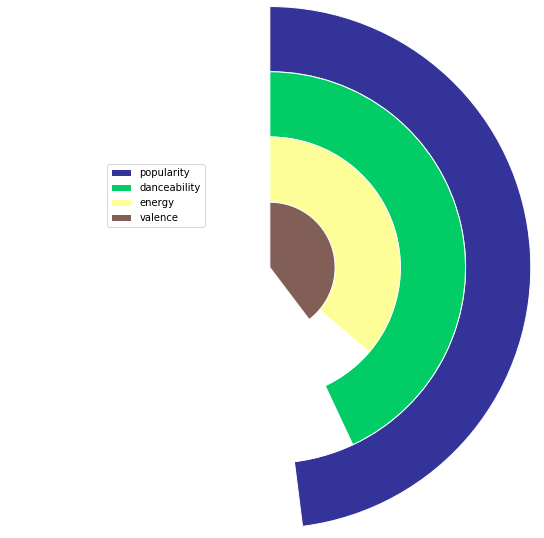

In [14]:
from matplotlib import cm
from math import log10

labels = df_norm.columns
data = df_norm.iloc[65675]

#number of data points
n = len(data)

#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 3
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

#plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.legend(loc=0)
plt.show()

In [15]:
import seaborn as sns

In [24]:
from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file

factors = ["a", "b", "c", "d", "e", "f", "g", "h"]
x =  [50, 40, 65, 10, 25, 37, 80, 60]

dot = figure(title="Categorical Dot Plot", tools="", toolbar_location=None,
            y_range=factors, x_range=[0,100])

dot.segment(0, factors, x, factors, line_width=2, line_color="green", )
dot.circle(x, factors, size=15, fill_color="orange", line_color="green", line_width=3, )

factors = ["foo 123", "bar:0.2", "baz-10"]
x = ["foo 123", "foo 123", "foo 123", "bar:0.2", "bar:0.2", "bar:0.2", "baz-10",  "baz-10",  "baz-10"]
y = ["foo 123", "bar:0.2", "baz-10",  "foo 123", "bar:0.2", "baz-10",  "foo 123", "bar:0.2", "baz-10"]
colors = [
    "#0B486B", "#79BD9A", "#CFF09E",
    "#79BD9A", "#0B486B", "#79BD9A",
    "#CFF09E", "#79BD9A", "#0B486B"
]

hm = figure(title="Categorical Heatmap", tools="hover", toolbar_location=None,
            x_range=factors, y_range=factors)

hm.rect(x, y, color=colors, width=1, height=1)

output_file("categorical.html", title="categorical.py example")

show(row(hm, dot, sizing_mode="scale_width"))  # open a browser

In [31]:
features = songs.columns
features

Index(['popularity', 'danceability', 'energy', 'valence'], dtype='object')

In [34]:
ID = df_norm.iloc[[65621,192477]].to_numpy()

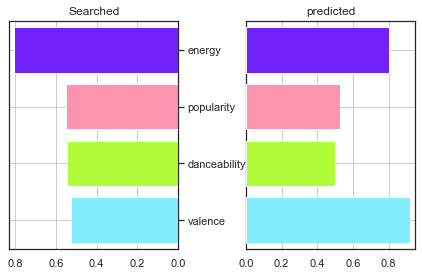

In [50]:

# Data
states = features
staff = ID[0]
sales = ID[1]

#colors
colors2 = ['#82EEFD','#B0FC38','#FC94AF','#7122FA','#08F7FE','#FC6E22','#037A90']

# Sort by number of sales staff
idx = staff.argsort()
states, staff, sales = [np.take(x, idx) for x in [states, staff, sales]]

y = np.arange(sales.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, staff, align='center', color=colors2, zorder=10)
axes[0].set(title='Searched')
axes[1].barh(y, sales, align='center', color=colors2, zorder=10)
axes[1].set(title='predicted')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.4)
plt.show()

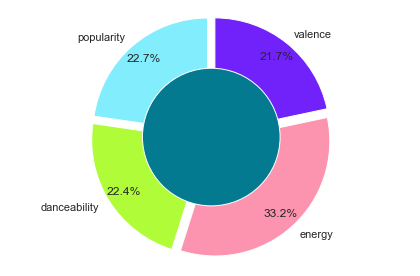

In [92]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = features
sizes2 = ID[0]
explode = (0.05,0.05,0.05,0.05)

fig, ax = plt.subplots()
ax.pie(sizes2, colors = colors2, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='#037A90')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()

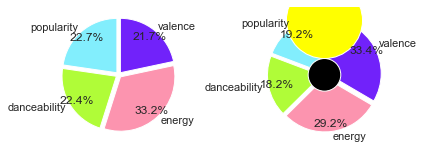

In [91]:
# Pie chart
labels = features
sizes1 = ID[0]
sizes2 = ID[1]
#colors
colors1 = ['#0A1172','#66b3ff','#FF1694','#560A86','#09FBD3','#F5D300','#FDD400']
colors2 = ['#82EEFD','#B0FC38','#FC94AF','#7122FA','#08F7FE','#FC6E22','#037A90']
#explsion
explode = (0.05,0.05,0.05,0.05)

fig, ax = plt.subplots(ncols=2)
ax[0].pie(sizes1, colors = colors2, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#fig, ax = plt.subplots()
ax[1].pie(sizes2, colors = colors2, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.30,fc='black')
centre_circle1 = plt.Circle((0,1),0.70,fc='yellow')



fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle1)

plt.tight_layout()
plt.show()
 